<a href="https://colab.research.google.com/github/verondel/innopolis_ml/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries

In [399]:
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

# Задание 1 (30%)



Сгенерировать случайным образом 3 набора данных (см. картинки). Количество точек в каждом от 100 до 200. Цветом обозначены метки классов. Для каждого набора данных:
- Разделить датасет на train/test (80/20)
- Обучить и протестировать KNN
- Построить графики точности классификации (на train/test выборках) при разных k(1...8)
- Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений


In [400]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Функции для 1 задания

In [401]:
def show_scatter(X_train, y_train, X_test):
  """
  Создать диаграмму рассеяния для визуализации обучающих и тестовых данных.

  Параметры:
  - X_train (array-like): Обучающие данные, массив с двумя признаками (X координата и Y координата)
  - y_train (array-like): Метки классов для данных обучения. Каждая метка соответствует точке в X_train.
  - X_test (array-like): Тестовые данные, массив с двумя признаками (X координата и Y координата).

  Визуализация включает в себя:
  - Отображение обучающих точек на диаграмме рассеяния с разными цветами для разных классов.
  - Отображение тестовых точек на диаграмме рассеяния зелеными звездами.

  Возвращаемое значение:
  Ничего. Функция выполняет только визуализацию данных.

  """
  cmap_bold = ["purple", "darkorange"]

  plt.figure(figsize=(5, 5))
  sns.scatterplot(
      x=X_train[:, 0],
      y=X_train[:, 1],
      hue=y_train,
      palette=cmap_bold
  )

  plt.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='*', s=100, label='test dots')
  plt.legend();


In [402]:
def show_diff_k(k_start=1, k_end=9, X_train=X_train, X_test=X_test,y_train=y_train, y_test=y_test):

  '''
   Визуализация влияния разных значений параметра k для метода K-Nearest Neighbors (KNN) без весов и с ними на точность на обучающих и тестовых данных.

    Параметры:
    k_start (int): Начальное значение параметра k для тестирования (по умолчанию 1).
    k_end (int): Конечное значение параметра k для тестирования (по умолчанию 9).
    X_train (numpy.ndarray): Признаки обучающих данных.
    X_test (numpy.ndarray): Признаки тестовых данных.
    y_train (numpy.ndarray): Метки обучающих данных.
    y_test (numpy.ndarray): Метки тестовых данных.

    Возвращаемое значение:
    Ничего. Функция выполняет только визуализацию данных.

    Эта функция создает два графика для сравнения влияния разных значений параметра k в методе ближайших соседей (KNN) на точность обучения и тестирования. Рассчитывается точность как при использовании расстояний между соседями, так и без них.

    - Первый график (слева) показывает точность обучения и тестирования без использования расстояний между соседями.
    - Второй график (справа) показывает точность обучения и тестирования с использованием расстояний между соседями (взвешенный KNN).

  '''

  # Создаем список значений k для проверки
  k_values = range(k_start, k_end)

  # Создаем списки для хранения точности на обучающей и тестовой выборках (без весов)
  train_accuracy = []
  test_accuracy = []

  # Создаем списки для хранения точности на обучающей и тестовой выборках (с весами)
  train_accuracy_weighted = []
  test_accuracy_weighted = []

  # Обучаем модель с разными значениями k и сохраняем точность (без весов)
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

    true_count, false_count = (sum(1 for x, y in zip(pred_test, y_test) if x == y),
                          sum(1 for x, y in zip(pred_test, y_test) if x != y))

  # Обучаем модель с разными значениями k и сохраняем точность (с весами)
  for k in k_values:
      knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')
      knn_weighted.fit(X_train, y_train)
      train_accuracy_weighted.append(knn_weighted.score(X_train, y_train))
      test_accuracy_weighted.append(knn_weighted.score(X_test, y_test))

  # Строим два графика в одной строке
  plt.figure(figsize=(14, 3))

  # Первый график (без весов)
  plt.subplot(1, 2, 1)
  plt.plot(k_values, train_accuracy, marker='o', label='Обучение (без весов)')
  plt.plot(k_values, test_accuracy, marker='s', label='Тест (без весов)')
  plt.title('Графики точности K-Nearest Neighbors (без весов) при разных k')
  plt.xlabel('Значение k')
  plt.ylabel('Точность')
  plt.legend()
  plt.grid(True)

  # Второй график (с весами)
  plt.subplot(1, 2, 2)
  plt.plot(k_values, train_accuracy_weighted, marker='x', label='Обучение (с весами)')
  plt.plot(k_values, test_accuracy_weighted, marker='d', label='Тест (с весами)')
  plt.title('Графики точности K-Nearest Neighbors (с весами) при разных k')
  plt.xlabel('Значение k')
  plt.ylabel('Точность')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

In [403]:
def metrics(y_test, pred_test, n_neighbors):
  '''
    Вычисляет и выводит различные метрики оценки качества классификации и матрицу расхождений.

    Параметры:
    y_test (array-like): Фактические значения (результативный признак) для тестовой выборки.
    pred_test (array-like): Предсказанные значения для тестовой выборки.
    n_neighbors (int): Количество соседей (для вывода в сообщении).

    Примечания:
    - Функция вычисляет следующие метрики оценки качества классификации:
      - Accuracy (точность)
      - Precision (точность)
      - Recall (полнота)
      - F1 Score (F1-мера)
    - Матрица расхождений (Confusion Matrix) строится и выводится в сообщении.

    Возвращаемое значение:
    Ничего. Функция выполняет только визуализацию данных.

    '''

  accuracy = accuracy_score(y_test, pred_test)
  precision = precision_score(y_test, pred_test)
  recall = recall_score(y_test, pred_test)
  f1 = f1_score(y_test, pred_test)

  print(f'При k равном {n_neighbors}')
  print(f'accuracy  = {accuracy:.2f}', f'precision = {precision:.2f}', f'recall    = {recall:.2f}', f'f1        = {f1:.2f}', sep='\n')

  # Построить матрицу расхождений (Confusion Matrix)
  confusion = confusion_matrix(y_test, pred_test)
  print(f"Матрица расхождений для k = {n_neighbors}:")
  print(confusion)

In [404]:
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors=6):
    '''
    Обучает модель K ближайших соседей (KNeighborsClassifier) и оценивает ее производительность на тестовых данных.

    Параметры:
    X_train (array-like): Признаки обучающих данных.
    y_train (array-like): Фактические значения (результативный признак) для обучающих данных.
    X_test (array-like): Признаки тестовых данных.
    y_test (array-like): Фактические значения (результативный признак) для тестовых данных.
    n_neighbors (int): Количество соседей для модели K ближайших соседей (по умолчанию 6).

    Возвращаемое значение:
    None

    Пример использования:
    train_and_evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors)
    '''

    # Создаем модель K ближайших соседей с заданным количеством соседей
    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Обучаем модель на обучающих данных
    model.fit(X_train, y_train)

    # Предсказываем результаты на тестовых данных
    pred_test = model.predict(X_test)

    # Считаем количество верных и неверных предсказаний
    true_count, false_count = (sum(1 for x, y in zip(pred_test, y_test) if x == y),
                               sum(1 for x, y in zip(pred_test, y_test) if x != y))
    print(f'True {true_count}', f'False {false_count}', sep='\n')

## 1.1. График 1

In [405]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200,
                    shuffle=True,
                    noise=.1,
                    random_state=None,
                    factor=0.5)

### 1.1.1. Разделить датасет на train/test (80/20)

In [406]:
# Разобьем выборку на обучение и тест с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=40)
X_train.shape, X_test.shape

((160, 2), (40, 2))

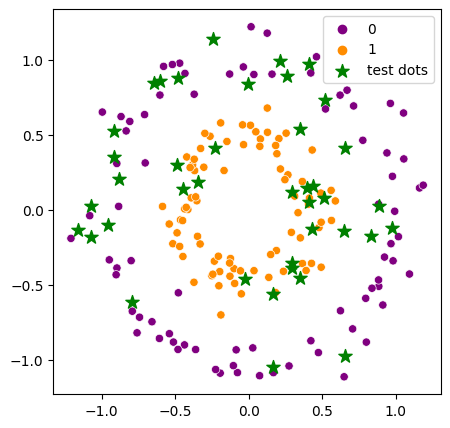

In [407]:
show_scatter(X_train, y_train, X_test)

### 1.1.2. Обучить и протестировать KNN

In [408]:
# Обучение модели K ближайших соседей (KNeighborsClassifier)
n_neighbors = 6
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

# Предсказания для тестовых объектов
pred_test = model.predict(X_test)

# Подсчёт количества верных и неверных предсказаний
true_count, false_count = (sum(1 for x, y in zip(pred_test, y_test) if x == y),
                           sum(1 for x, y in zip(pred_test, y_test) if x != y))
print(f'True {true_count}', f'False {false_count}', sep='\n')

True 39
False 1


### 1.1.3. Построить графики точности классификации (на train/test выборках) при разных k(1...8)

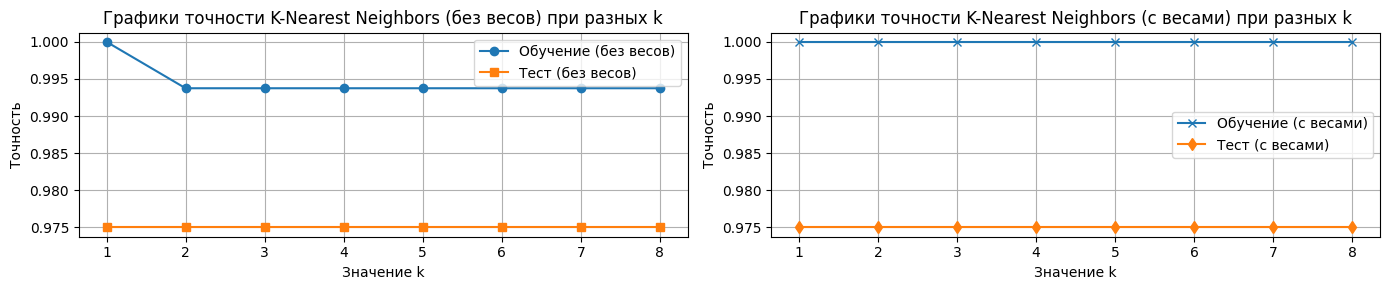

In [409]:
show_diff_k(k_start=1, k_end=9, X_train=X_train, X_test=X_test,y_train=y_train, y_test=y_test)

### 1.1.4. Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений

In [410]:
metrics(y_test, pred_test, n_neighbors)

При k равном 6
accuracy  = 0.97
precision = 1.00
recall    = 0.94
f1        = 0.97
Матрица расхождений для k = 6:
[[22  0]
 [ 1 17]]


## 1.2. График 2

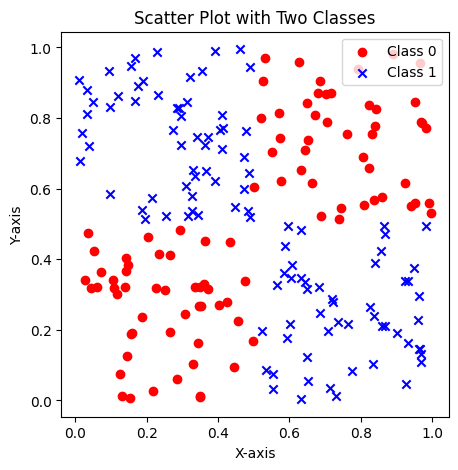

In [411]:
data = np.random.rand(200, 2)
square_size = 1
y = np.zeros(200, dtype=int)

# Переводим точки в левом нижнем и правом верхнем квадратах в один класс
for i in range(200):
    if (data[i, 0] > square_size / 2 and data[i, 1] > square_size / 2) or (data[i, 0] < square_size / 2 and data[i, 1] < square_size / 2):
      y[i] = 0
    else:
      y[i] = 1

# Создаем scatter plot с двумя классами
plt.figure(figsize=(5, 5))
plt.scatter(data[y == 0][:, 0], data[y == 0][:, 1], c='red', marker='o', label='Class 0')
plt.scatter(data[y == 1][:, 0], data[y == 1][:, 1], c='blue', marker='x', label='Class 1')

# Добавляем метки и легенду
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Two Classes')
plt.legend()

# Отображаем график
plt.show()

### 1.2.1. Разделить датасет на train/test (80/20)

In [412]:
# Разобьем выборку на обучение и тест с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=6, test_size=40)
X_train.shape, X_test.shape

((160, 2), (40, 2))

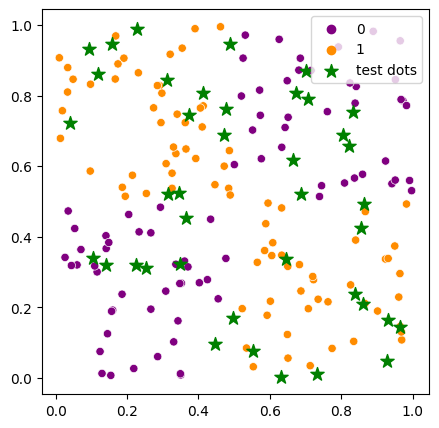

In [413]:
show_scatter(X_train, y_train, X_test)

### 1.2.2. Обучить и протестировать KNN

In [414]:
# Обучение модели K ближайших соседей (KNeighborsClassifier)
n_neighbors = 20
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

# Предсказания для тестовых объектов
pred_test = model.predict(X_test)

# Подсчёт количества верных и неверных предсказаний
true_count, false_count = (sum(1 for x, y in zip(pred_test, y_test) if x == y),
                           sum(1 for x, y in zip(pred_test, y_test) if x != y))
print(f'True {true_count}', f'False {false_count}', sep='\n')

True 37
False 3


### 1.3.3. Построить графики точности классификации (на train/test выборках) при разных k(1...8)

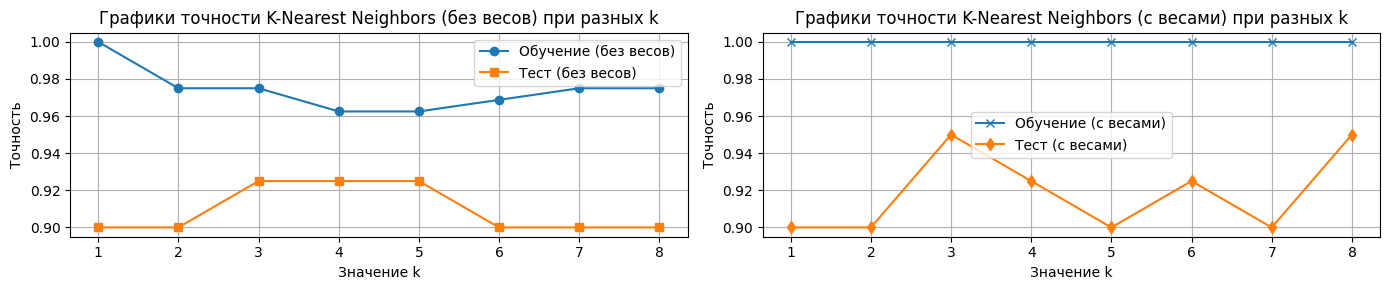

In [415]:
show_diff_k(1, 9, X_train, X_test, y_train, y_test)

### 1.3.4. Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений

In [416]:
metrics(y_test, pred_test, n_neighbors)

При k равном 20
accuracy  = 0.93
precision = 0.96
recall    = 0.92
f1        = 0.94
Матрица расхождений для k = 20:
[[15  1]
 [ 2 22]]


## 1.3. График 3

In [417]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=6)

### 1.3.1. Разделить датасет на train/test (80/20)

In [418]:
# Разобьем выборку на обучение и тест с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=20)
X_train.shape, X_test.shape

((80, 2), (20, 2))

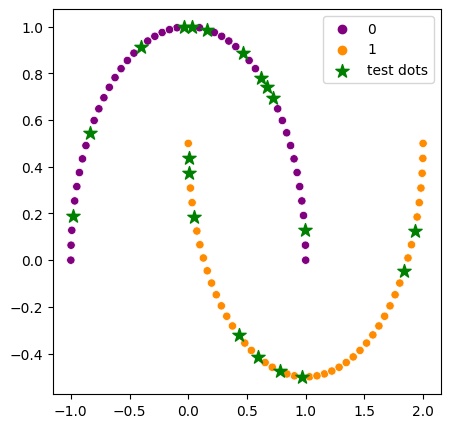

In [419]:
show_scatter(X_train, y_train, X_test)

### 1.3.2. Обучить и протестировать KNN

In [420]:
# Обучение модели K ближайших соседей (KNeighborsClassifier)
n_neighbors = 20
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

# Предсказания для тестовых объектов
pred_test = model.predict(X_test)

# Подсчёт количества верных и неверных предсказаний
true_count, false_count = (sum(1 for x, y in zip(pred_test, y_test) if x == y),
                           sum(1 for x, y in zip(pred_test, y_test) if x != y))
print(f'True {true_count}', f'False {false_count}', sep='\n')

True 18
False 2


### 1.3.3. Построить графики точности классификации (на train/test выборках) при разных k(1...8)

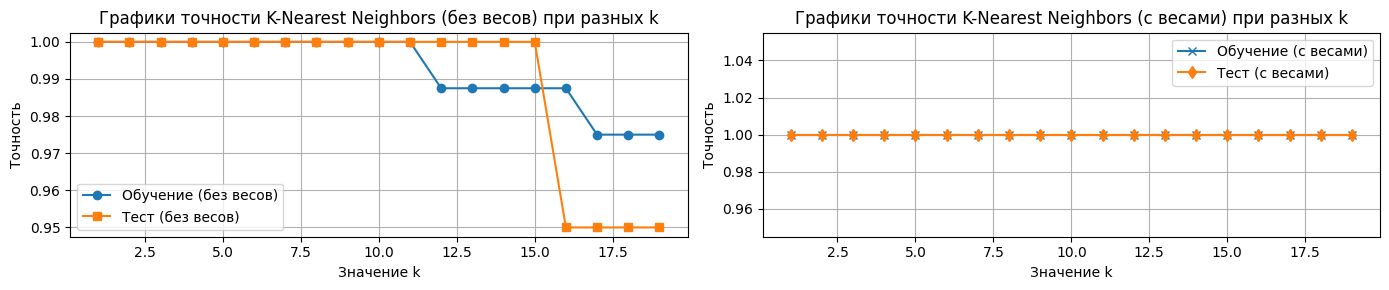

In [421]:
# Построила до 20 для наглядности
show_diff_k(1, 20, X_train, X_test, y_train, y_test)

### 1.3.4. Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений

In [422]:
metrics(y_test, pred_test, n_neighbors)

При k равном 20
accuracy  = 0.90
precision = 1.00
recall    = 0.78
f1        = 0.88
Матрица расхождений для k = 20:
[[11  0]
 [ 2  7]]


---


# Задание 2 (20%)

25 объектов классифицированы на 3 класса

Написать код на python, который воспроизводитвывод, представленный ниже(не используя сторонние библиотеки, кроме numpy). Данные представлены в следующей ячейке.



In [423]:
C = "Cat"
F = "Fish"
H = "Hen"
zoo = [C, F, H]
# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

Источники:
1. [Accuracy, precision, and recall in multi-class classification](https://www.evidentlyai.com/classification-metrics/multi-class-metrics#:~:text=Calculate%20the%20number%20of%20true,averaged%20precision%20and%20recall%20scores)
2. [F-1 Score for Multi-Class Classification](https://www.baeldung.com/cs/multi-class-f1-score)

### 2.1. Расчет руками

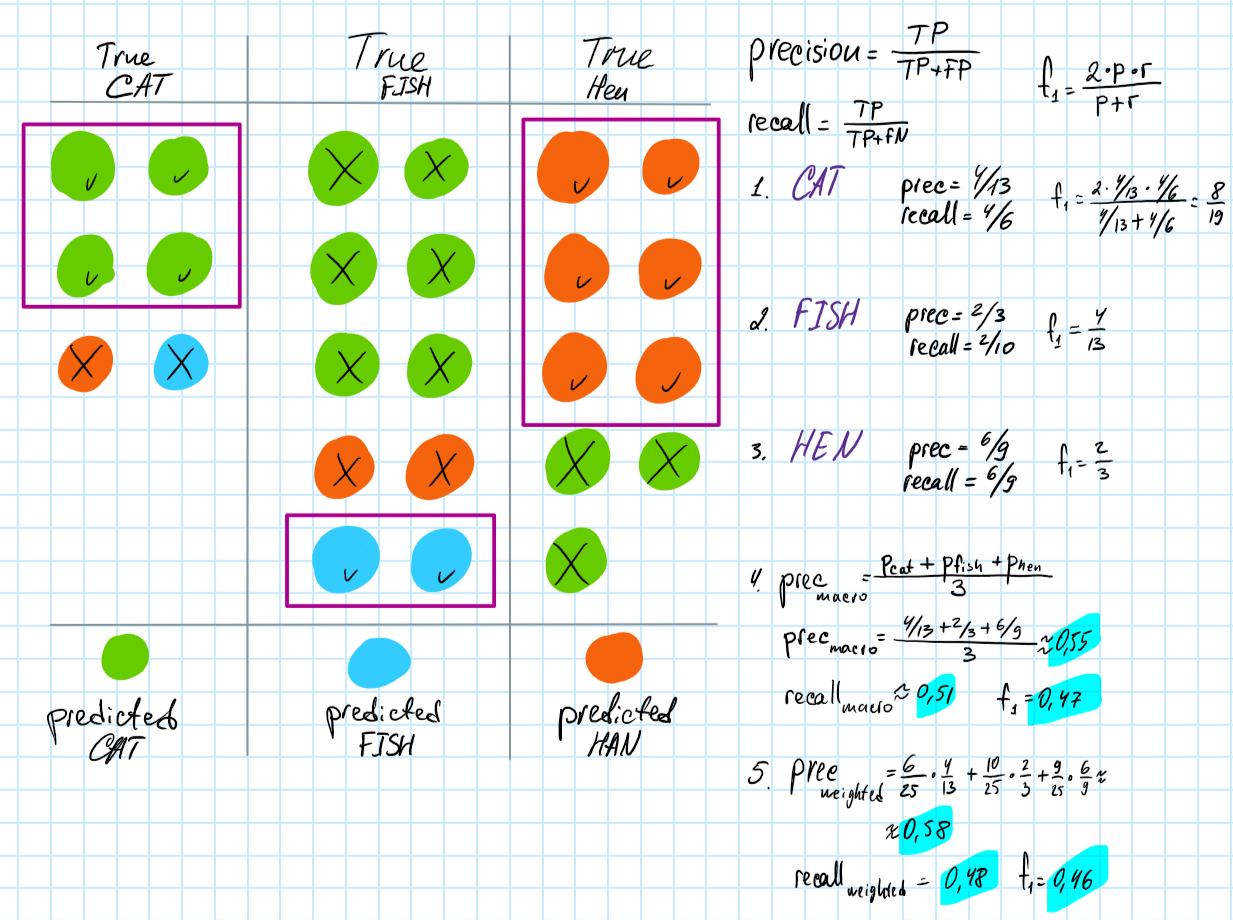

### 2.2. Расчет с помощью python

#### precision, recall, f1

$precision = \frac{TP}{TP+FP} $

In [424]:
precision = []
for i in zoo:
  TP_amount = [True if a == i  and b == i else False for a,b in zip(y_true, y_pred)].count(True)
  TP_FP_amount = [True if a == i else False for a in  y_pred].count(True)
  precision.append(TP_amount/(TP_FP_amount))
  print(f"precision {i} = {precision[-1]:.2}")

precision Cat = 0.31
precision Fish = 0.67
precision Hen = 0.67


$recall = \frac{TP}{TP+FN} $

In [425]:
recall = []
for i in zoo:
  TP_amount = [True if a == i  and b == i else False for a,b in zip(y_true, y_pred)].count(True)
  TP_FN_amount = [True if a == i else False for a in y_true].count(True)
  recall.append(TP_amount / (TP_FN_amount))
  print(f"recall {i} = {recall[-1]:.2}")

recall Cat = 0.67
recall Fish = 0.2
recall Hen = 0.67


$F_{1\_score}=\frac{2\ast precision\ast recall}{presicion+recall}$


In [426]:
f1 = []
for i in range(len(zoo)):
  f1.append((2*precision[i]*recall[i])/(precision[i]+recall[i]))
  print(f'f1 {zoo[i]} = {f1[i]:.2}')

f1 Cat = 0.42
f1 Fish = 0.31
f1 Hen = 0.67


#### macro, weighted


$$precision_{macro} = \frac{precision_{cat} + precision_{fish} + precision_{han}}{3} $$
аналогично для $recall$ и $f1$

In [427]:
precision_macro = sum(precision) / 3
recall_macro = sum(recall) / 3
f1_macro = sum(f1) / 3
print(f"{precision_macro:.2}", f"{recall_macro:.2}", f"{f1_macro:.2}")

0.55 0.51 0.47


$$precision_{weighted} = \sum_{i=1}^{n} w_i \ast precision_i$$
аналогично для $recall$ и $f1$

In [428]:
weights = []
for i in zoo:
  weights.append([x for x in y_true if x == i].count(i) / len(y_true))

precision_weighted = sum([a * b for a, b in zip(weights, precision)])
recall_weighted = sum([a * b for a, b in zip(weights, recall)])
f1_weighted = sum([a * b for a, b in zip(weights, f1)])
print(f"{precision_weighted:.2}", f"{recall_weighted:.2}", f"{f1_weighted:.2}")

0.58 0.48 0.46


### Проверка результатов

In [429]:
print(f"{precision_macro:.2}", f"{recall_macro:.2}", f"{f1_macro:.2}")
print(f"{precision_weighted:.2}", f"{recall_weighted:.2}", f"{f1_weighted:.2}")

0.55 0.51 0.47
0.58 0.48 0.46


In [430]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         Cat       0.31      0.67      0.42         6
        Fish       0.67      0.20      0.31        10
         Hen       0.67      0.67      0.67         9

    accuracy                           0.48        25
   macro avg       0.55      0.51      0.47        25
weighted avg       0.58      0.48      0.46        25



# Задание 3 (50%)

Линейная регрессия
1. Самостоятельно выберите набор данных, над которым вы хотите работать.
2. Загрузите  данные  и  напишите  код,  чтобы  разбить набор на  обучающий и тестовый наборы данных. Выберите как  минимум 3 переменных,  которые вы можете  использовать  для  прогнозирования  значений некоторой целевой переменной в наборе.
3. Измерьте точность вашей модели на тренировочном и тестовом наборе данных. Обучите простую (одномерную) линейную  регрессию для  каждой  выбранной переменной. Какая из них дает лучший R2?

Датасет: [Salary Prediction dataset](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer/data)

In [431]:
import os
from pandas import read_csv
from pandas import get_dummies
from pandas import concat

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [432]:
os.chdir("/content/drive/MyDrive/sem5_python/data")
filename = "Salary Data.csv"
df = read_csv(filename)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## EDA

In [433]:
df.shape

(375, 6)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [435]:
df['Gender'].value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [436]:
df['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [437]:
df['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

**Вывод:**

Факторные признаки (X):
- Age,
- Gender,
- Years Of Experience,
- Education Level.

Результативный признак (y):
- Salary


## Data preprocessing

In [438]:
# Удаляем столбец "Job Title" из датафрейма df
df=df.drop("Job Title",axis=1)

# Выводим количество пропущенных значений (NaN) в каждом столбце датафрейма
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Years of Experience    2
Salary                 2
dtype: int64

In [439]:
# Удаляем строки с пропущенными значениями из датафрейма
df = df.dropna()
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0


In [440]:
# One-hot encoding
df=get_dummies(df,columns=["Gender","Education Level"],dtype=int)
df.head()

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,0,1,1,0,0
1,28.0,3.0,65000.0,1,0,0,1,0
2,45.0,15.0,150000.0,0,1,0,0,1
3,36.0,7.0,60000.0,1,0,1,0,0
4,52.0,20.0,200000.0,0,1,0,1,0


In [441]:
# Устанавливаем опции для вывода массивов NumPy, чтобы избежать научной записи
np.set_printoptions(suppress=True)

# Разделяем данные на факторные признаки (X) и результативный признак (y)
X = df.drop("Salary",axis=1)
y = df["Salary"]

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Стандартизация данных:
$$x = \frac{x - mean}{std}$$


In [442]:
# Создаем объект StandardScaler для стандартизации данных
scaler = StandardScaler()

# Применяем стандартизацию к данным тренировочного набора (X_train)
X_standard_train = scaler.fit_transform(X_train)

# Применяем стандартизацию к данным тестового набора (X_test)
X_standard_test = scaler.transform(X_test)

In [443]:
def show_hist_diff(data_1, title_1, xlabel_1, data_2, title_2, xlabel_2):
  '''
  Отображает две гистограммы для сравнения распределений двух наборов данных.

    Параметры:
    data_1 (array-like): Первый набор данных, который будет отображен в левой гистограмме.
    title_1 (str): Заголовок для левой гистограммы.
    xlabel_1 (str): Подпись оси X (горизонтальной) для левой гистограммы.
    data_2 (array-like): Второй набор данных, который будет отображен в правой гистограмме.
    title_2 (str): Заголовок для правой гистограммы.
    xlabel_2 (str): Подпись оси X (горизонтальной) для правой гистограммы.

    Примечания:
    - Функция создает гистограммы для сравнения распределений двух наборов данных.
    - Обе гистограммы отображаются в одной строке.
    - Гистограммы имеют 10 столбцов (бинов) и обозначены разными цветами для наглядного сравнения.
    - Заголовки и подписи осей X настраиваются для каждой гистограммы.
    - Гистограммы снабжены сеткой для улучшения читаемости.

    Возвращаемое значение:
    Ничего. Функция выполняет только визуализацию данных.

    Пример использования:
    show_hist_diff(data_set1, "Распределение данных 1", "Значения", data_set2, "Распределение данных 2", "Значения")
    plt.show()
  '''
  plt.figure(figsize=(10, 3))

  plt.subplot(1, 2, 1)
  plt.grid(True)
  plt.hist(data_1, bins=10, edgecolor='k', color='#9042f5', alpha=0.7)
  plt.title(title_1)
  plt.xlabel(xlabel_1)
  plt.ylabel("Частота")

  plt.subplot(1, 2, 2)
  plt.hist(data_2, bins=10, edgecolor='k', color='#f5a442', alpha=0.7)
  plt.title(title_2)
  plt.xlabel(xlabel_2)
  plt.ylabel("Частота")
  plt.grid(True)

  plt.tight_layout()
  plt.show()

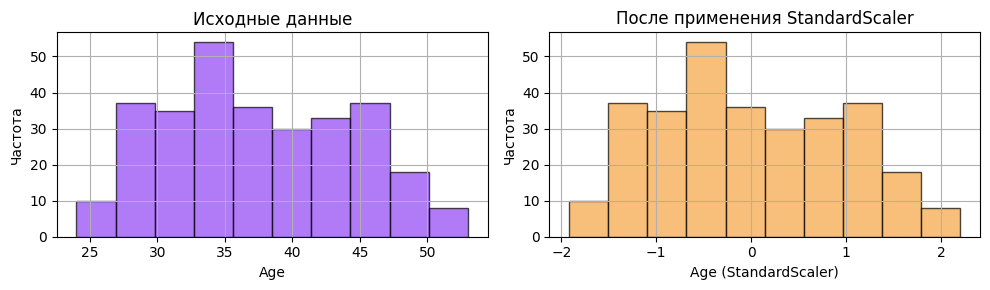

In [444]:
X_original_col = [row[0] for row in X_train.values]
X_standard_col = [row[0] for row in X_standard_train]

show_hist_diff(X_original_col, "Исходные данные","Age",
               X_standard_col, "После применения StandardScaler", "Age (StandardScaler)")

## Линейная регрессия

In [445]:
from sklearn.metrics import r2_score

regressor = LinearRegression()
r2_scores = {}


for i in range(X_standard_train.shape[1]):
    X_train_single_feature = X_standard_train[:, i].reshape(-1, 1)
    regressor.fit(X_train_single_feature, y_train)

    # Проведите предсказания на тестовой выборке
    X_test_single_feature = X_standard_test[:, i].reshape(-1, 1)
    y_pred = regressor.predict(X_test_single_feature)

    # Измерьте R2 на тестовой выборке, а не на обучающей
    r2 = r2_score(y_test, y_pred)

    column = X_train.columns[i]
    r2_scores[column] = r2
r2_scores

{'Age': 0.8488782955782095,
 'Years of Experience': 0.8991338517367767,
 'Gender_Female': 0.0042018174510009,
 'Gender_Male': 0.0042018174510009,
 "Education Level_Bachelor's": 0.2890231735150992,
 "Education Level_Master's": 0.06470212453832547,
 'Education Level_PhD': 0.15413651374317516}

In [446]:
best_feature = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_feature]

print(f"Переменная '{best_feature}' дает лучший R2 ({best_r2:.4})")

Переменная 'Years of Experience' дает лучший R2 (0.8991)
